# Коллекции

**Коллекция в ```Python```** — программный объект (переменная-контейнер), хранящая набор значений одного или различных типов, позволяющий обращаться к этим значениям, а также применять специальные функции и методы, зависящие от типа коллекции.


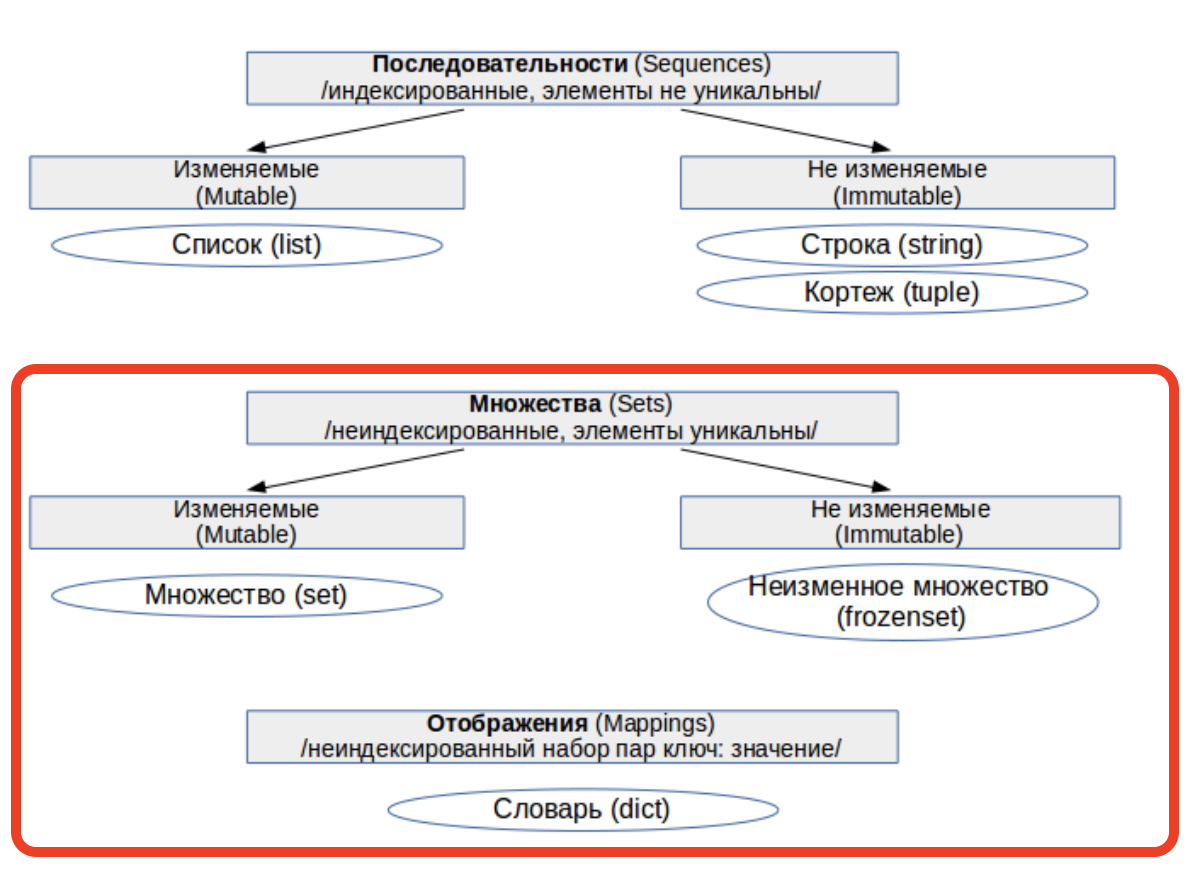

## Пояснения терминологии:

**```Индексированность```** – каждый элемент коллекции **имеет свой порядковый номер — индекс**. 

Это позволяет обращаться к элементу по его порядковому индексу, проводить слайсинг («нарезку») — брать часть коллекции выбирая исходя из их индекса.

**```Уникальность```** – каждый элемент коллекции **может встречаться в ней только один раз**. 

Это порождает требование неизменности используемых типов данных для каждого элемента, например, таким элементом не может быть список.

**```Изменяемость коллекции```** — позволяет добавлять в коллекцию новых членов или удалять их после создания коллекции.


### Примечание для словаря (dict):

* **сам словарь изменяем** — можно добавлять/удалять новые пары ключ: значение;
* **значения элементов словаря** — изменяемые и не уникальные;
* **ключи** — не изменяемые и уникальные, поэтому, например, мы не можем сделать ключом словаря список, но можем кортеж. Из уникальности ключей, так же следует уникальность элементов словаря — пар ключ: значение.

> **Важное замечание:** Для того, чтобы объект мог быть ключом словаря, он должен быть хешируем. У кортежа, возможен случай, когда его элемент является не хешируемым объектом, и соответственно сам кортеж тогда тоже не является хешируемым и не может выступать ключом словаря.

### Создание ХЭШ коллекций

> **```{}``` без значений создают словарь, а со значениями, в зависимости от синтаксиса могут создавать как множество, так и словарь:**

In [ ]:
a = {}
print(a, type(a), sep="\t\t")     # <class 'dict'>

b = {1, 2, 3}   
print(b, type(b), sep="\t\t")     # <class 'set'>

c = {'a': 1, 'b': 2}
print(c, type(c), sep="\t\t")     # <class 'dict'>

### Печать элементов коллекции с помощью функции ```print()```

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

print(my_dict)   # {'a': 1, 'c': 3, 'e': 5, 'f': 6, 'b': 2, 'd': 4}

my_dict["j"] = 123
my_dict["j"]
print(my_dict)

### Получение значений по ключу и их уникальность

In [ ]:
my_dict = {1: "I", 
           "II": 2, 
           (3, "III"): ["three", 3, "III"]}

print(my_dict[1])
print(my_dict["II"])
print(my_dict[(3, "III")])

In [ ]:
my_dict = {1: "I", 
           "II": 2, 
           1: ["three", 3, "III"],
          }

print(my_dict)
print(my_dict[1])
print(my_dict["II"])

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}
print(my_dict["a"])
print(my_dict["z"])  # Ошибка когда пытаемся получить элемент по тому ключю, которого нет!

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}
print(my_dict.get("a"))
print(my_dict.get("z")) # None когда пытаемся получить элемент по тому ключю, которого нет!

### Проблема нехэшируемых улючей

In [ ]:
a = [1]
(type(a))      
b = {a: 1}            # TypeError: unhashable type: 'list'
print(type(b), b)

In [ ]:
a = [1]
hash(a)

In [ ]:
a = ("asd")
(type(a))        # <type 'tuple'>
b = {a: 1}            # TypeError: unhashable type: 'list'
print(type(b), b)

In [ ]:
a = (1)
hash(a)

In [ ]:
a = (1, [2, 3], 4)
print(type(a))        # <type 'tuple'>
b = {a: 1}            # TypeError: unhashable type: 'list'
print(type(b))

In [ ]:
a = (1, [2, 3], 4)
hash(a)

In [ ]:
a = (1, 2, 3, 4)
print(type(a))   # <type 'tuple'>
b = {a: 1}
print(type(b), b)

In [ ]:
a = (1, 2, 3, "asd", 5, 4)
hash(a)

### Добавление элементов в словарь

In [ ]:
my_dict = {}
print(my_dict)

my_dict["a"] = 1
print(my_dict)

for value, key in enumerate(["b", "c", "d"]):
    my_dict[key] = value

print(my_dict)   

In [ ]:
my_dict = {}
print(my_dict)

my_dict["a"] = []
print(my_dict)

for value in range(5):
    my_dict["a"].append(value)

print(my_dict)   

## Общие подходы к работе с любой коллекцией

Разобравшись в классификацией, рассмотрим что можно делать с любой стандартной коллекцией независимо от её типа:

### Подсчёт количества членов коллекции с помощью функции ```len()```

In [ ]:
my_dict = {'a': 1, 
           'b': 2, 
           'c': 3,
           'd': 4, 
           'e': 5, 
           'f': [6, 7]}

print(len(my_dict))     # 6 - для словаря пара ключ-значение считаются одним элементом. 

### Проверка принадлежности элемента данной коллекции c помощью оператора ```in```

**```x in s```** — вернет ```True```, если элемент входит в коллекцию **```s```** и ```False``` — если не входит

Есть и вариант проверки не принадлежности: **```x not in s```**, где есть по сути, просто добавляется отрицание перед булевым значением предыдущего выражения.

Для словаря возможны варианты, понятные из кода ниже:

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

print('a' in my_dict)               # True - без указания метода поиск по ключам
print(1 in my_dict)                 # False - без указания метода поиск по ключам

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

print(my_dict.keys())
print(my_dict.values())
print(my_dict.items()) 

In [ ]:
print('a' in my_dict.keys())        # True - аналогично примеру выше
print('a' in my_dict.values())      # False - так как 'а' — ключ, не значение
print(1 in my_dict.values())        # True

Можно ли проверять пары? Можно!

In [ ]:
print(('a', 1) in my_dict.items())   # True
print(('a', 2) in my_dict.items())   # False

### Обход всех элементов коллекции в цикле ```for in```

В данном случае, в цикле будут последовательно перебираться элементы коллекции, пока не будут перебраны все из них.

```python
for elm in my_list:
    print(elm)
```

> Обратите внимание на следующие моменты:

* **Порядок обработки элементов для не индексированных коллекций может быть не тот, как при их создании**

* **У прохода в цикле по словарю есть свои особенности:**

```python
for elm in my_dict:
    # При таком обходе словаря, перебираются только ключи
	# равносильно for elm in my_dict.keys()
    print(elm)

for elm in my_dict.values():
    # При желании можно пройти только по значениям
    print(elm)
```

Но чаще всего нужны пары ```ключ (key)``` — ```значение (value)```.

```python
for key, value in my_dict.items():
	# Проход по .items() возвращает кортеж (ключ, значение), 
	# который присваивается кортежу переменных key, value
	print(key, value)
```

> **Возможная ошибка:** Не меняйте количество элементов коллекции в теле цикла во время итерации по этой же коллекции! — Это порождает не всегда очевидные на первый взгляд ошибки.

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

for key in my_dict:
    print(key)

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

for key in my_dict.keys():
    print(key)

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

for value in my_dict.values():
    print(value)

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

for item in my_dict.items():
    print(item)

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

for key, value in my_dict.items():
    print(f"Key={key}, value={value}")

### Функции min(), max(), sum()

Функции ```min()```, ```max()``` — поиск минимального и максимального элемента соответственно — работают не только для числовых, но и для строковых значений.
```sum()``` — суммирование всех элементов, если они все числовые.


In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

print(sum(my_dict.values()))                          # 21

## Конвертация одного типа коллекции в другой

В зависимости от стоящих задач, один тип коллекции можно конвертировать в другой тип коллекции. Для этого, как правило достаточно передать одну коллекцию в функцию создания другой.

In [ ]:
my_tuple = ('a', 'b', 'a')
my_list = list(my_tuple)
my_set = set(my_tuple)                            # теряем индексы и дубликаты элементов!
my_frozenset = frozenset(my_tuple)                # теряем индексы и дубликаты элементов!
print(my_tuple, 
      my_list, 
      my_set, 
      my_frozenset, sep="\n")    # ('a', 'b', 'a') ['a', 'b', 'a'] {'a', 'b'} frozenset({'a', 'b'})

**Обратите внимание, что при преобразовании одной коллекции в другую возможна потеря данных:**

* При преобразовании в множество теряются дублирующие элементы, так как множество содержит только уникальные элементы! Собственно, проверка на уникальность, обычно и является причиной использовать множество в задачах, где у нас есть в этом потребность.
* При конвертации индексированной коллекции в неиндексированную теряется информация о порядке элементов, а в некоторых случаев она может быть критически важной!
* После конвертации в не изменяемый тип, мы больше не сможем менять элементы коллекции — удалять, изменять, добавлять новые. Это может привести к ошибкам в наших функциях обработки данных, если они были написаны для работы с изменяемыми коллекциями.

**Дополнительные детали:**

Способом выше не получится создать словарь, так как он состоит из пар ключ: значение.

Это ограничение можно обойти, создав словарь комбинируя ключи со значениями с использованием **```zip()```**:

In [ ]:
my_dict = {'a': 1, 'b': 2, 'c': 3}
print(my_dict)

In [ ]:
my_dict = dict('a': 1, 'b': 2, 'c': 3)
print(my_dict)

In [ ]:
my_dict = dict((('a', 1), ('b', 2), ('c', 3)))
print(my_dict)

In [ ]:
my_keys = ('a', 'b', 'c')
my_values = [1, 2, 3]

print(zip(my_keys, my_values))

In [ ]:
my_keys = ('a', 'b', 'c')
my_values = [1, 2, 3]

print(*zip(my_keys, my_values))

In [ ]:
my_keys = ('a', 'b', 'c')
my_values = [1, 2, 3]

zp = zip(my_keys, my_values)

In [ ]:
next(zp)

In [ ]:
my_keys = ('a', 'b', 'c')
my_values = [1, 2, 3]

print(*zip(my_keys, my_values))

my_dict = dict(zip(my_keys, my_values))
print(my_dict)

In [ ]:
my_keys = ('a', 'b', 'c')
my_values = [1, 2]

zp = zip(my_keys, my_values)

In [ ]:
next(zp)

In [ ]:
my_keys = ('a', 'b', 'c')
my_values = [1, 2]      # Если количество элементов разное - 
                        # будет отработано пока хватает на пары - лишние отброшены
my_dict = dict(zip(my_keys, my_values))
print(my_dict)          # {'a': 1, 'b': 2}

### Особенности сортировки словаря

**В сортировке словаря есть свои особенности, вызванные тем, что элемент словаря — это пара ключ: значение.**

> Так же, не забываем, что говоря о сортировке словаря, мы имеем ввиду сортировку полученных из словаря данных для вывода или сохранения в индексированную коллекцию. 

> Сохранить данные сортированными в самом стандартном словаре не получится, они в нем, как и других неиндексированных коллекциях находятся в произвольном порядке.

* **```sorted(my_dict)```** — когда мы передаем в функцию сортировки словарь без вызова его дополнительных методов — идёт перебор только ключей, сортированный список ключей нам и возвращается;
* **```sorted(my_dict.keys())```** — тот же результат, что в предыдущем примере, но прописанный более явно;
* **```sorted(my_dict.items())```** — возвращается сортированный список кортежей (ключ, значение), сортированных по ключу;
* **```sorted(my_dict.values())```** — возвращается сортированный список значений

### Рассмотрим подробнее эти объекты

In [ ]:
my_dict = {'a': 1, 'c': 3, 'e': 5, 'f': 6, 'b': 2, 'd': 4}
dict_keys = my_dict.keys()
print(dict_keys)

In [ ]:
dict_keys[2]

In [ ]:
next(dict_keys)

In [ ]:
dk_iter = iter(dict_keys)

In [ ]:
next(dk_iter)

In [ ]:
list(dk_iter)

In [ ]:
list(dict_keys)

---

In [ ]:
my_dict = {'a': 1, 'c': 3, 'e': 5, 'f': 6, 'b': 2, 'd': 4}
my_dict.sort()

In [ ]:
my_dict = {'a': 1, 'c': 3, 'e': 5, 'f': 6, 'b': 2, 'd': 4}

mysorted = sorted(my_dict)
print(mysorted)           # ['a', 'b', 'c', 'd', 'e', 'f']

mysorted = sorted(my_dict.items())
print(mysorted)           # [('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6)]

mysorted = sorted(my_dict.values())
print(mysorted)           # [1, 2, 3, 4, 5, 6]

**Отдельные сложности может вызвать сортировка словаря не по ключам, а по значениям, если нам не просто нужен список значений, и именно выводить пары в порядке сортировки по значению.**

> Для решения этой задачи можно в качестве специальной функции сортировки передавать ```lambda```-функцию ```lambda x: x[1]``` которая из получаемых на каждом этапе кортежей (ключ, значение) будет брать для сортировки второй элемент кортежа.

In [ ]:
population = {"Shanghai": 24256800, "Karachi": 23500000, "Beijing": 21516000, "Delhi": 16787941}

# отсортируем по возрастанию населения:
population_sorted = sorted(population.items(), key=lambda x: x[1])
print(population_sorted)
# [('Delhi', 16787941), ('Beijing', 21516000), ('Karachi', 23500000), ('Shanghai', 24256800)]

In [ ]:
population = {"Shanghai": 24256800, "Karachi": 23500000, "Beijing": 21516000, "Delhi": 16787941}

# отсортируем в алфавитном порядке:
population_sorted = sorted(population.items(), key=lambda x: x[0])
print(population_sorted)
# [('Delhi', 16787941), ('Beijing', 21516000), ('Karachi', 23500000), ('Shanghai', 24256800)]

### Дополнительная информация по использованию параметра key при сортировке

Допустим, у нас есть список кортежей названий деталей и их стоимостей.

In [ ]:
shop = [('каретка', 1200), ('шатун', 1000), ('седло', 300),
        ('педаль', 100), ('седло', 1500), ('рама', 12000),
        ('обод', 2000), ('шатун', 200), ('седло', 2700)]

shop.sort()

for det, price in shop:
    print(f"{det:10} цена: {price}р.")

Нам нужно отсортировать его сначала по названию деталей, а одинаковые детали по убыванию цены.

In [ ]:
shop = [('каретка', 1200), ('шатун', 1000), ('седло', 300),
        ('педаль', 100), ('седло', 1500), ('рама', 12000),
        ('обод', 2000), ('шатун', 200), ('седло', 2700)]

def prepare_item(item):
    return (item[0], -item[1])

shop.sort(key=prepare_item)

for det, price in shop:
    print(f"{det:10} цена: {price}р.")

Перед тем, как сравнивать два элемента списка к ним применялась функция prepare_item, которая меняла знак у стоимости (функция применяется ровно по одному разу к каждому элементу. В результате при одинаковом первом значении сортировка по второму происходила в обратном порядке.

> Чтобы не плодить утилитарные функции, вместо использования сторонней функции, того же эффекта можно добиться с использованием лямбда-функции.

In [ ]:
shop = [('каретка', 1200), ('шатун', 1000), ('седло', 300),
        ('педаль', 100), ('седло', 1500), ('рама', 12000),
        ('обод', 2000), ('шатун', 200), ('седло', 2700)]

shop.sort(key=lambda x: (x[0], -x[1]))

for det, price in shop:
    print(f"{det:10} цена: {price}р.")

### Устойчивость сортировки

Допустим данные нужно отсортировать:
* сначала по столбцу **А** по возрастанию, 
* затем по столбцу **B** по убыванию, 
* и наконец по столбцу **C** снова по возрастанию.

Если данные в столбце **B** числовые, то при помощи подходящей функции в ```key``` можно поменять знак у элементов **B**, что приведёт к необходимому результату.
А если все данные текстовые? Тут есть такая возможность.
Дело в том, что сортировка ```sort``` в ```Python``` устойчивая (начиная с Python 2.2), то есть она не меняет порядок «одинаковых» элементов.

**Поэтому можно просто отсортировать три раза по разным ключам:**

```python
data.sort(key=lambda x: x['C'])
data.sort(key=lambda x: x['B'], reverse=True)
data.sort(key=lambda x: x['А'])
```

## Объединение словарей, добавление и удаление элементов

Сложить два словаря чтобы получить третий оператором ```+``` Питон не позволяет ```«TypeError: unsupported operand type(s) for +: 'dict' and 'dict'»```.

> Это можно сделать по-другому комбинируя методы ```.copy()``` и ```update()```:

In [ ]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}

dict1 + dict2

### Для изменения словаря 

Для добавления элементов другого словаря используется метод **```.update()```**.

> Обратите внимание: для совпадающих ключей словаря при этом обновляются значения:

In [ ]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'a': 100, 'c': 3, 'd': 4}

dict1.update(dict2)
print(dict1)        # {'a': 100, 'b': 2, 'c': 3, 'd': 4}
print(dict2)        # {'a': 100, 'c': 3, 'd': 4}

In [ ]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'a': 100, 'c': 3, 'd': 4}

dict2.update(dict1)

print(dict1)        # {'a': 1, 'b': 2}
print(dict2)        # {'a': 1, 'c': 3, 'd': 4, 'b': 2}

In [ ]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}

dict3 = dict1.copy()
dict3.update(dict2)

print(dict1)        # {'a': 1, 'b': 2}
print(dict2)        # {'c': 3, 'd': 4}
print(dict3)        # {'a': 1, 'c': 3, 'b': 2, 'd': 4}

В Питоне 3.5 появился более изящный способ:

In [ ]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}
dict3 = {**dict1, **dict2}
print(dict3)                 # {'a': 1, 'c': 3, 'b': 2, 'd': 4}

In [ ]:
dict1 = {'a': 1, 'b': 2, 'c': 5}
dict2 = {'c': 3, 'd': 4, 'b': 10}
dict3 = {**dict1, **dict2}
print(dict3)                 # {'a': 1, 'b': 10, 'c': 3, 'd': 4}